<a href="https://colab.research.google.com/github/yunjeong-chang/smarcle-winter-study/blob/main/4%EC%A3%BC%EC%B0%A8(2)_%EC%BA%90%EA%B8%80_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# 데이터 확인**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(3)
tf.random.set_seed(3)

pd_train = pd.read_csv('train.csv')
pd_test = pd.read_csv('test.csv')
pd_submit = pd.read_csv('gender_submission.csv')

In [ ]:
pd_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


*   PassengerId : 승객 번호
*   Survived : 생존 여부 (NO=0, YES=1) -> 테스트 데이터로 이 생존 여부 예측하는 것!
*   Pclass : 티켓 등급 (1=1st, 2=2nd, 3=3rd) ★
*   Name : 이름 (의미있는 정보 뽑아서 숫자로 바꿔야 함)
*   Sex : 성별 (숫자로 바꿔야 함)
*   Age : 나이 (적당한 기준 세워서 간단한 숫자로 바꿔보자)
*   SibSp : 사촌이나 배우자가 동승 했는지
*   Parch : 부모나 자식이 동승 했는지
*   Ticket : 티켓 넘버
*   Fare : 요금
*   Cabin	: 선실 넘버 (NAN : Not a Number 주의)
*   Embarked : 어떤 선착장에서 탔는지

In [ ]:
pd_train.info() #12개의 컬럼과, 891개의 승객 정보
                #Age는 714개의 정보밖에 없네?
                #Cabin은 204개의 정보밖에 없네? 아마 아까 봤던 NaN 인듯!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
pd_test.info() #11개의 컬럼과 418개의 승객 정보
               #빠진 하나의 컬럼은 생존 여부를 나타내는 Survived
               #마찬가지로 Age하고 Cabin은 정보가 좀 빠져 있다!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
pd_train.isnull().sum() #Age랑 Cabin은 많이 빠져 있어서 보정 필요하다!
                        #Embarked도 2개는 빠져 있구나

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
pd_test.isnull().sum() #여기도 역시 Age랑 Cabin은 많이 빠져 있다.
                       #Fare도 1개 빠져 있네

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# **# 데이터 시각화**

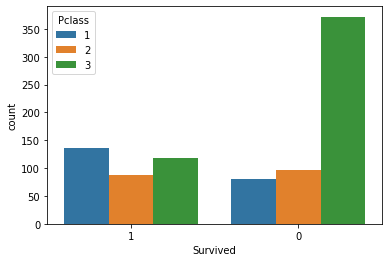

In [ ]:
sns.countplot(data=pd_train, x="Survived", hue="Pclass", order= [1, 0]) #티켓 등급별(1등석, 2등석, 3등석) 생존 여부(생존=1, 사망=0)
                                                                        #생존률은 1등석 승객이 높고, 사망률은 3등석 승객이 높음

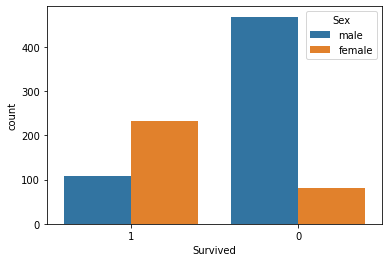

In [ ]:
sns.countplot(data=pd_train, x="Survived", hue="Sex", order= [1, 0]) #성별 별 생존 여부(생존=1, 사망=0)
                                                                     #생존률은 여성이 높고, 사망률은 남성이 높음

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


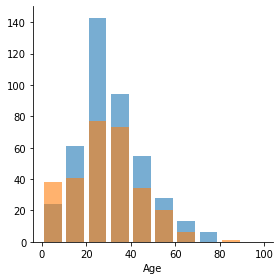

In [ ]:
grid = sns.FacetGrid(pd_train, hue='Survived', size=4)
grid.map(plt.hist, 'Age', alpha=.6, rwidth=0.8, bins=[0,10,20,30,40,50,60,70,80,90,100])

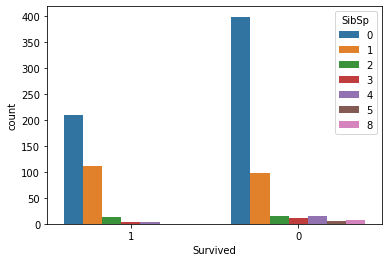

In [ ]:
sns.countplot(data=pd_train, x="Survived", hue="SibSp", order= [1, 0]) #사촌이나 배우자 동승 별 생존 여부(생존=1, 사망=0)
                                                                       #?

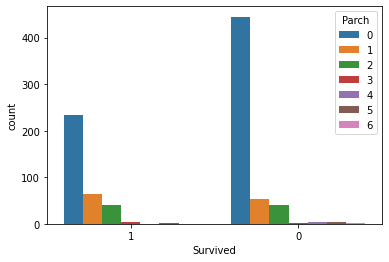

In [ ]:
sns.countplot(data=pd_train, x="Survived", hue="Parch", order= [1, 0]) #부모나 자식 동승 별 생존 여부(생존=1, 사망=0)
                                                                       #?

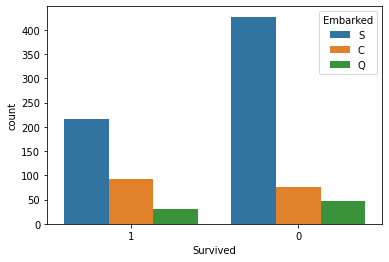

In [ ]:
sns.countplot(data=pd_train, x="Survived", hue="Embarked", order= [1, 0]) #선착장 별 생존 여부(생존=1, 사망=0)
                                                                          #?

# **# 데이터 전처리**

< To Do List >
1. 삭제할 데이터 지우기
2. Name : 이름 (의미있는 정보 뽑아서 숫자로 바꿔야 함)
3. Sex : 성별 (숫자로 바꿔야 함)
4. Age : 나이  (빠져있는 값 많았음, 적당한 기준 세워서 간단한 숫자로 바꿔보자)
5. Embarked : 빠져있는 데이터 어떻게 처리할지?

In [ ]:
train_test_data = [pd_train, pd_test] #전처리 한번에 하려고 잠깐 학습셋이랑 테스트셋 합쳐 두기

**1. 삭제할 데이터 지우기**

*   PassengerId : 필요 없어
*   SibSp랑 Parch : 묶어서 가족으로 처리해봤지만 지우는게 더 점수 높았음
*   Ticket : 필요 없어
*   Fare : 요금을 아주 적게 낸(15이하?) 사람들 사망률 높길래 따로 처리 해봤지만, 없애는게 더 점수 높았음
*   Cabin : 알파벳 대문자만 따서 숫자로 바꾸고, NaN값도 Pclass랑 비교해서 전부 넣어주기까지 해봤는데 그냥 없애는게 더 점수 높았음


---


**Pclass**(★), **Name**(호칭따서 Title로 정리), **Sex**(★), **Age**(이것도 지워도 될까하고 지워봤었는데 안지우는게 점수 더 높음), **Embarked**(은근 영향)








In [ ]:
pd_train.drop('PassengerId', axis=1, inplace=True)
#pd_test.drop('PassengerId', axis=1, inplace=True)?

pd_train.drop('SibSp', axis=1, inplace=True)
pd_test.drop('SibSp', axis=1, inplace=True)

pd_train.drop('Parch', axis=1, inplace=True)
pd_test.drop('Parch', axis=1, inplace=True)

pd_train.drop('Ticket', axis=1, inplace=True)
pd_test.drop('Ticket', axis=1, inplace=True)

pd_train.drop('Fare', axis=1, inplace=True)
pd_test.drop('Fare', axis=1, inplace=True)

pd_train.drop('Cabin', axis=1, inplace=True)
pd_test.drop('Cabin', axis=1, inplace=True)

**2. Name : 이름 (의미있는 정보 뽑아서 숫자로 바꿔야 함)**

In [ ]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) #대문자로 시작하여 소문자로 나열되며 .을 만나면 멈추고 Title에 저장

In [ ]:
pd_train['Title'].value_counts() #각각의 value 빈도 측정

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Lady          1
Don           1
Jonkheer      1
Sir           1
Capt          1
Countess      1
Ms            1
Mme           1
Name: Title, dtype: int64

In [ ]:
#특징이 뚜렷한 Mr,Miss,Mrs만 0,1,2로 놓고 나머지는 3으로!
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3, "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

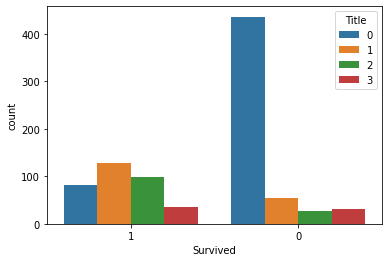

In [ ]:
sns.countplot(data=pd_train, x="Survived", hue="Title", order= [1, 0]) #Mr에 비해 Miss 하고 Mrs가 생존률이 높음

In [ ]:
#이름 속성 삭제
pd_train.drop('Name', axis=1, inplace=True)
pd_test.drop('Name', axis=1, inplace=True)

In [ ]:
pd_train.head()

,Survived,Pclass,Sex,Age,Embarked,Title
0,0,3,male,22.0,S,0
1,1,1,female,38.0,C,2
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,2
4,0,3,male,35.0,S,0


**3. Sex : 성별 (숫자로 바꿔야 함)**

In [ ]:
#남자 0으로 여자 1로 #LabelEncoder써도 되는데 train, test 두번 해줘야 함
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [ ]:
pd_train.head()

,Survived,Pclass,Sex,Age,Embarked,Title
0,0,3,0,22.0,S,0
1,1,1,1,38.0,C,2
2,1,3,1,26.0,S,1
3,1,1,1,35.0,S,2
4,0,3,0,35.0,S,0


**4. Age : 나이 (빠져있는 값 많았음, 적당한 기준 세워서 간단한 숫자로 바꿔보자)**

In [ ]:
#Age에서 빠져있는 값이 있으면, Title정보를 보고 그 정보에 속하는 집단의 중앙값을 나이로 넣자!
pd_train["Age"].fillna(pd_train.groupby("Title")["Age"].transform("median"), inplace=True) #mean해도 점수차이는 없음
pd_test["Age"].fillna(pd_test.groupby("Title")["Age"].transform("median"), inplace=True)

In [ ]:
pd_train.isnull().sum() #Age값 전부 채워진 것 확인

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    2
Title       0
dtype: int64

(0.0, 30.0)

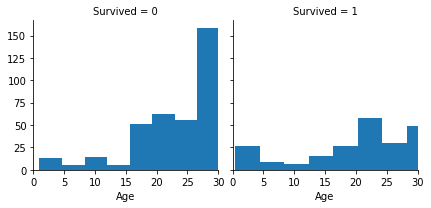

In [ ]:
#Age도 적당한 기준으로 나눠보자
g = sns.FacetGrid(pd_train, col='Survived')
g.map(plt.hist, 'Age', bins=20);
plt.xlim(0, 30)
#plt.xlim(16, 50)
#plt.xlim(30, 40)
#plt.xlim(36, 80)

In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 36), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 36, 'Age'] = 4

**5. Embarked : 빠져있는 데이터 어떻게 처리할지?**

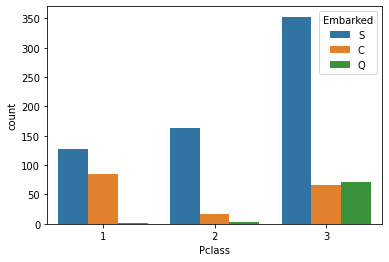

In [ ]:
#Embarked는 train 데이터에서 2개 빠져 있었음
sns.countplot(data=pd_train, x="Pclass", hue="Embarked")

In [ ]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
pd_train.isnull().sum() #Embarked값 전부 채워진 것 확인

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
Title       0
dtype: int64

In [ ]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [ ]:
pd_train.head()

,Survived,Pclass,Sex,Age,Embarked,Title
0,0,3,0,1.0,0,0
1,1,1,1,4.0,1,2
2,1,3,1,1.0,0,1
3,1,1,1,3.0,0,2
4,0,3,0,3.0,0,0


# **# 모델 생성 및 학습과 테스트**

In [ ]:
#학습데이터 슬라이싱
x_train = pd_train.iloc[:,1:]
y_train = pd_train.iloc[:,:1]
#테스트데이터 슬라이싱
x_test = pd_test.iloc[:,1:]

In [ ]:
#로지스틱회귀 쓰려면 데이터 정규화(스케일링)! 각 feature의 평균을 0, 분산을 1로 변경, 모든 특성들이 같은 스케일을 갖게 됨
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_test = model.predict(x_test).flatten()

# **# 예측 결과 저장**

In [ ]:
for i in range(len(pd_submit)):
  pd_submit['Survived'][i] = np.round(y_test[i]).astype(int)
  #pd_submit['Survived']= pd_submit['Survived'].astype(int)
pd_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
pd_submit.to_csv("Titanic_result.csv", index=False,header=True)